Amazon Review Sentiment Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
sns.set_theme(style="darkgrid")
plt.style.use('ggplot')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
#Read in data
path = "/content/Amazon_Unlocked_Mobile.csv"
df = pd.read_csv(path)
print(df.shape)
#Since the dataset is quick large, we will only use the first 1000 entries
df = df.head(1000)
#df.describe
df.columns

(413840, 6)


Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [6]:
#Clean the data, get rid of whitespaces and newline characters
df['Reviews'] = df['Reviews'].str.strip()
df['Reviews'] = df['Reviews'].str.replace('>','')
df['Reviews'] = df['Reviews'].str.replace('-','')

Exploratory Data Analysis

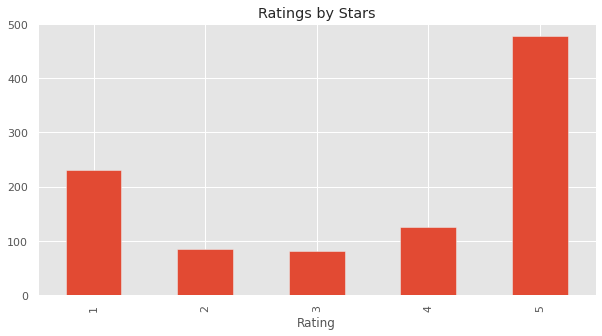

In [7]:
#Plot of the ratings of the reviews in a bar graph
ax = df['Rating'].value_counts().sort_index() \
     .plot(kind = 'bar', title = 'Ratings by Stars', figsize=(10,5))
ax.set_xlabel('Rating')
plt.show()

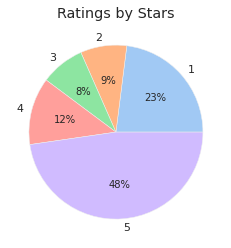

In [8]:
#Plot the ratings of the reviews in a pie chart
colors = sns.color_palette('pastel')[0:5]
labels = ['1','2','3','4','5']
plt.pie(df['Rating'].value_counts().sort_index(), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Ratings by Stars')
plt.show()

Vader Sentiment Analysis

In [9]:
#Run polarity score on reviews using VADER
sentiment_score = {}
df.insert(loc=5, column='Sentiment', value=None)
for index, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Reviews']
  sentiment_score[index] = analyzer.polarity_scores(text)
  neg = sentiment_score[index]['neg']
  neu = sentiment_score[index]['neu']
  pos = sentiment_score[index]['pos']

  if neg > pos:
    df.loc[index, 'Sentiment'] = 'Negative'
  elif pos > neg:
    df.loc[index, 'Sentiment'] = 'Positive'
  else:
    df.loc[index, 'Sentiment'] = 'Neutral'


  0%|          | 0/1000 [00:00<?, ?it/s]

In [10]:
vaders = pd.DataFrame(sentiment_score).T
vaders.columns

Index(['neg', 'neu', 'pos', 'compound'], dtype='object')

In [11]:
#Creates a new dataframe called analysis that contains the vaders results and the information from our original dataframe
df1 = df[['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews']]
df2 = df[['Sentiment', 'Review Votes']]
df_intermediate = pd.concat([df1, vaders], axis=1)
analysis = pd.concat([df_intermediate, df2], axis=1)

In [12]:
analysis.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,neg,neu,pos,compound,Sentiment,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,0.015,0.796,0.189,0.8783,Positive,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.072,0.597,0.331,0.9231,Positive,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.000,0.238,0.762,0.4927,Positive,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.000,0.500,0.500,0.9185,Positive,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.038,0.897,0.065,0.2942,Positive,0.0


Exploratory Data Anlysis

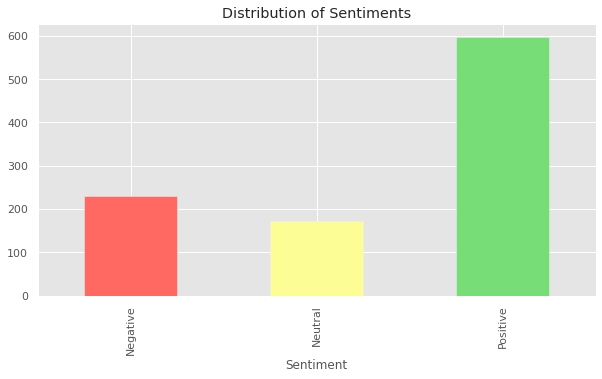

In [13]:
#Plot the distribution of sentiments in a bar graph
colors = ['#FF6961', '#FDFD96', '#77DD77']
ax = df['Sentiment'].value_counts().sort_index() \
     .plot(kind = 'bar', title = 'Distribution of Sentiments', figsize=(10,5), color = colors)
ax.set_xlabel('Sentiment')
plt.show()

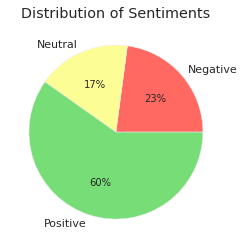

In [14]:
#Plot the distribution of sentiments in a pie chart
labels = ['Negative','Neutral','Positive']
plt.pie(df['Sentiment'].value_counts().sort_index(), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Sentiments')
plt.show()

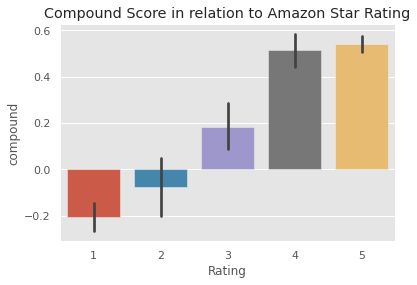

In [15]:
#Graph of compound score in relation to Amazon star rating
ax = sns.barplot(data=analysis, x = 'Rating', y = 'compound')
ax.set_title('Compound Score in relation to Amazon Star Rating')
plt.show()

(0.6, 1.0)

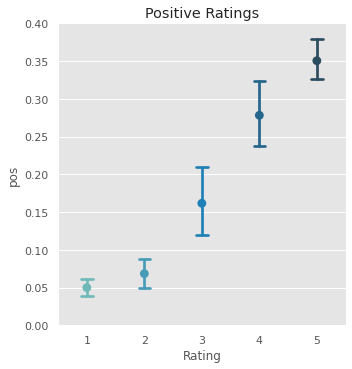

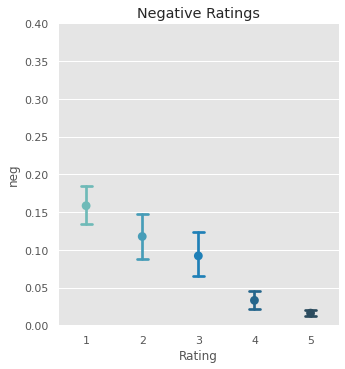

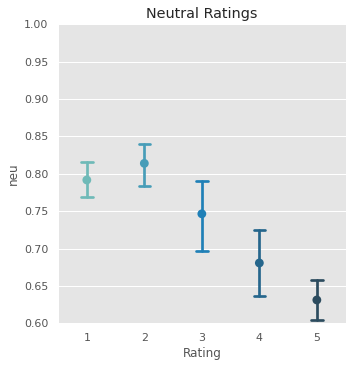

In [16]:
#Graph of positive, negative, and neutral score in raltion to Amazon star rating
g1 = sns.catplot(data=analysis, x='Rating', y='pos', palette="YlGnBu_d", 
                 kind="point", errorbar="se", capsize=.2).set(title='Positive Ratings')
g1.ax.set_ylim(0, 0.4)

g2 = sns.catplot(data=analysis, x='Rating', y='neg', palette="YlGnBu_d", 
                 kind="point", errorbar="se", capsize=.2).set(title='Negative Ratings')
g2.ax.set_ylim(0, 0.4)

g3 = sns.catplot(data=analysis, x='Rating', y='neu', palette="YlGnBu_d", 
                 kind="point", errorbar="se", capsize=.2).set(title='Neutral Ratings')
g3.ax.set_ylim(0.6, 1)